In [ ]:
import pandas as pd

In [2]:
min_grant_perc = 0.30 # 30% of per capita entitlement

# Victoria

In [3]:
vic_councils = pd.read_excel("../Data/FA Grants Data Tables.xlsx", sheet_name="Victoria")

In [4]:
vic_councils.drop(columns = [column for column in vic_councils.columns if "Unnamed" in column], inplace=True)

In [5]:
total_grant_vic = vic_councils["Grant unadjusted"].sum()
current_per_capita_minimum_vic = 25.60
per_capita_vic = current_per_capita_minimum_vic / min_grant_perc

In [ ]:
vic_councils["Deficit"] = vic_councils["Funding Gap"].apply(lambda x: 1 if x > 0 else 0)
vic_councils["Minimum Grant (PC Basis)"] = min_grant_perc * per_capita_vic * vic_councils["ERP"]

total_deficit_vic = vic_councils["Deficit"] @ vic_councils["Funding Gap"]

vic_councils["Raw Allocation"] = vic_councils["Funding Gap"] * vic_councils["Deficit"] * total_grant_vic / total_deficit_vic

NameError: name 'vic' is not defined

# South Australia

In [3]:
import numpy as np
import scipy.optimize as opt

In [28]:
sa_councils = pd.read_excel("../Data/FA Grants Data Tables - Worked.xlsx", sheet_name="South Australia")

/home/spulick/miniforge3/envs/fagrants/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Web Extension extension is not supported and will be removed
  warn(msg)


In [29]:
sa_councils

,Council,Population (current year),Per Capita Minimum Council (PCM),Total Raw Calc,Per Capita Applied Amount,Per Capita Applied Amount (per head),Estimated Grant (GPG),Estimated Grant (per head),Deficit,Minimum Grant (PC basis),...,New Grant Adjusted,New Grant Per Capita,Change %,Change from prev year,Real yoy change,Per Capita Change,YoY Change Flag,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Adelaide,27901,PCM,-71481892,710359,25.46,710359,25.46,0,710359.46,...,7.103595e+05,25.460000,0.00,8.53,8.53,0.00,0,NaN,NaN,NaN
1,Adelaide Hills,41842,PCM,-4454563,1065297,25.46,1065297,25.46,0,1065297.32,...,1.065297e+06,25.460000,0.00,2.57,2.57,0.00,0,NaN,NaN,NaN
2,Adelaide Plains,10932,-,5052887,1892230,173.09,1717083,157.07,1,278328.72,...,1.921130e+06,175.734539,11.88,23.07,10.00,2.64,0,NaN,NaN,NaN
3,Alexandrina,30323,-,5057998,1894144,62.47,1844007,60.81,1,772023.58,...,1.923073e+06,63.419622,4.29,5.71,1.36,0.95,0,NaN,Total Grant to State,1.531528e+08
4,Barossa,26268,-,6430573,2408153,91.68,1779006,67.73,1,668783.28,...,2.444932e+06,93.076454,37.43,58.05,15.00,1.40,1,NaN,Per Capita,8.486667e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,West Torrens,64519,PCM,-20788774,1642654,25.46,1642654,25.46,0,1642653.74,...,1.642654e+06,25.460000,0.00,3.88,3.88,0.00,0,NaN,NaN,NaN
64,Whyalla,21902,-,15713243,5884374,268.67,5728616,261.56,1,557624.92,...,5.974244e+06,272.771640,4.29,13.71,9.03,4.10,0,NaN,NaN,NaN
65,Wudinna,1161,-,4248089,1590845,1370.24,1548736,1333.97,1,29559.06,...,1.615142e+06,1391.164702,4.29,6.11,1.75,20.92,0,NaN,NaN,NaN
66,Yankalilla,6100,-,289390,108372,17.77,227235,37.25,1,155306.00,...,1.100274e+05,18.037272,-51.58,-54.00,-5.00,0.27,1,NaN,NaN,NaN


In [30]:
sa_non_min = sa_councils[sa_councils["MGC"] != 1]

<Axes: ylabel='Frequency'>

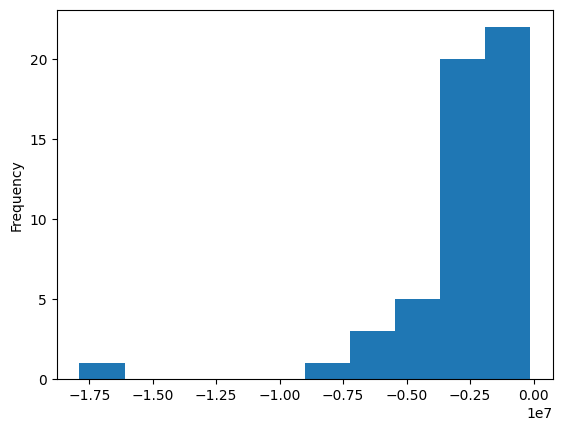

In [38]:
(-1 * sa_non_min["Raw Allocation"]).plot(kind="hist")

In [31]:
total_grants = sa_non_min["New Grant"].sum()

In [32]:
G_t = np.array(sa_non_min["New Grant"])
G_t_1 = np.array(sa_non_min["2023 - 2024"])

In [44]:
def yoy_flag(G_t, G_t_1):
    g = (G_t - G_t_1)/ G_t_1

    return np.where((g >= 0.3) | (g <= -0.15), 1, 0)

In [41]:
import matplotlib.pyplot as plt

In [ ]:
while yoy_flag(G_t, G_t_1).sum() > 0:
    gap = (G_t - G_t_1)/ G_t_1

    rho = -1 * gap / sum(abs(gap))

    sa_non_min["New Grant"] = sa_non_min["New Grant"] + rho * np.random.uniform(sa_non_min["New Grant"].min(), sa_non_min["New Grant"].max())  


    G_t = np.array(sa_non_min["New Grant"])
    G_t_1 = np.array(sa_non_min["2023 - 2024"])
